In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV

In [2]:
# загрузим обучающую и тестовую выборки
train_df = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [3]:
# Установка опции, чтобы отображать все столбцы
pd.set_option('display.max_columns', None)  # Отобразить все столбцы
pd.set_option('display.expand_frame_repr', False)  # Не переносить строки
#рассмотрим данные
train_df

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,0.151985,2.0,1.0,0.168542,0.0,Education,0.0,23.0,5.0,2539.0,247.0,50072.0,15005.0,5569.083333,0.908289,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,0.175693,3.0,0.0,0.141553,0.0,Home,0.0,27.0,11.0,844.0,694.0,91878.0,64877.0,14345.583333,0.797339,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,0.444605,3.0,0.0,0.030987,1.0,Education,0.0,21.0,12.0,12756.0,651.0,292300.0,13918.0,25000.000000,0.915945,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,0.188452,7.0,0.0,0.379843,0.0,Debt Consolidation,0.0,27.0,21.0,1524.0,529.0,13070.0,3846.0,2890.250000,0.876416,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,0.273431,3.0,1.0,0.068659,0.0,Debt Consolidation,0.0,35.0,9.0,1973.0,128.0,33357.0,351603.0,25000.000000,0.888689,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,0.477742,1.0,3.0,0.154680,0.0,Education,0.0,26.0,2.0,2064.0,798.0,168225.0,681.0,25000.000000,0.786244,4.0,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,0.322554,2.0,0.0,0.175333,0.0,Home,0.0,24.0,2.0,4418.0,3846.0,118627.0,1748.0,1250.000000,0.738173,3.0,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,0.497062,2.0,0.0,0.402618,0.0,Education,0.0,26.0,17.0,2212.0,1560.0,254403.0,3625.0,1250.000000,0.761952,3.0,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#рассмотрим данные
X_test

,ID,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,376,0.077124,2,0,0.438186,0,Auto,0,28,15,5008,619,5627,25585,17257.916667,0.883232,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,1,2006-04-10,28,64653,674,65491,48,Single,2,Own,238,0.073977,4,2,0.446233,0,Education,0,23,28,4590,710,317306,18282,5387.750000,0.791928,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,2,2013-11-28,41,300000,768,16811,60,Single,1,Own,469,0.331499,5,0,0.035313,0,Auto,0,23,9,2429,623,13115,6136,25000.000000,0.805826,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,567,0.544696,2,1,0.278922,0,Education,0,24,9,14571,10749,25320,93806,25000.000000,0.829294,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,106,0.436103,0,0,0.196376,0,Home,0,14,6,930,2926,439068,2852,25000.000000,0.735013,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,1993-03-19,40,300000,850,12696,60,Married,1,Other,434,0.062521,5,1,0.407260,0,Home,0,31,12,1487,1557,21046,10089,25000.000000,0.914606,3,Self-Employed,Master,19,10957,0.102696,0.094445,266.295150,0.028012,1
4996,4996,2015-09-27,39,75014,572,49380,48,Married,0,Mortgage,97,0.057142,2,1,0.267701,0,Education,0,19,20,4451,963,22600,15013,6251.166667,0.862521,3,Employed,Master,16,7587,0.268380,0.302377,1784.809960,0.301033,0
4997,4997,1993-10-04,43,15000,454,32810,72,Divorced,1,Other,289,0.403643,2,0,0.031880,0,Other,0,25,24,7340,565,415342,11420,1250.000000,0.754070,6,Employed,Bachelor,17,403922,0.330810,0.283165,951.731011,0.992585,0
4998,4998,1981-05-10,53,98467,850,28446,96,Single,1,Own,213,0.137445,1,1,0.039883,0,Other,1,29,13,1077,112,101804,805201,8205.583333,0.964434,6,Self-Employed,High School,30,5652,0.148446,0.163516,532.966868,0.090910,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          5000 non-null   int64  
 1   ApplicationDate             5000 non-null   object 
 2   Age                         5000 non-null   int64  
 3   AnnualIncome                5000 non-null   int64  
 4   CreditScore                 5000 non-null   int64  
 5   LoanAmount                  5000 non-null   int64  
 6   LoanDuration                5000 non-null   int64  
 7   MaritalStatus               5000 non-null   object 
 8   NumberOfDependents          5000 non-null   int64  
 9   HomeOwnershipStatus         5000 non-null   object 
 10  MonthlyDebtPayments         5000 non-null   int64  
 11  CreditCardUtilizationRate   5000 non-null   float64
 12  NumberOfOpenCreditLines     5000 non-null   int64  
 13  NumberOfCreditInquiries     5000 

In [7]:
train_df.describe()

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,10487.000000,10487.000000,9986.000000,9986.000000,10487.000000,10487.000000,9986.000000,10487.000000,10487.000000,10487.000000,10487.000000,9986.000000,10487.000000,10487.000000,10487.000000,10487.000000,9986.000000,9.986000e+03,1.048700e+04,10487.000000,10487.000000,10487.000000,10487.000000,9.986000e+03,9986.000000,10487.000000,10487.000000,10487.000000,10487.000000,1.048700e+04
mean,39.850386,131587.872127,678.082716,29874.218306,53.439878,1.568323,546.458642,0.284397,3.033565,0.979498,0.250610,0.052574,0.096405,24.008868,15.625250,5484.590159,1988.494893,1.830476e+05,6.881696e+04,10838.934141,0.784428,4.949271,17.628302,1.542381e+05,0.200392,0.200112,1075.622426,0.517577,0.511776,-2.569878e+04
std,11.614132,115791.941909,175.192486,27705.509722,24.493562,1.418684,501.981888,0.159240,1.740186,0.990927,0.144543,0.223192,0.295160,4.844917,8.680774,8490.327012,3047.919512,4.673964e+05,2.032359e+05,9385.924858,0.123039,2.201100,11.337248,4.622229e+05,0.094388,0.096458,1344.053181,0.894637,0.499885,1.431675e+06
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,0.003227,0.000000,0.000000,8.000000,1.000000,31.000000,16.000000,8.920000e+02,7.800000e+01,1250.000000,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,0.000000,-9.999999e+06
25%,32.000000,20959.500000,550.000000,12658.000000,36.000000,0.000000,233.250000,0.158929,2.000000,0.000000,0.138695,0.000000,0.000000,21.000000,8.000000,1397.000000,533.250000,2.311100e+04,7.983500e+03,1683.541667,0.708475,3.000000,9.000000,7.252500e+03,0.119908,0.119548,375.872620,0.066734,0.000000,3.256475e+01
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,398.000000,0.262229,3.000000,1.000000,0.228638,0.000000,0.000000,24.000000,16.000000,2961.000000,1122.500000,6.054350e+04,2.262500e+04,7371.250000,0.803692,5.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,1.000000,4.411876e+01
75%,48.000000,257025.000000,850.000000,37158.000000,60.000000,3.000000,685.000000,0.391683,4.000000,2.000000,0.341013,0.000000,0.000000,27.000000,23.000000,6222.500000,2300.000000,1.616955e+05,5.951700e+04,21232.583333,0.879312,6.000000,26.000000,1.241758e+05,0.264709,0.264880,1279.930203,0.637457,1.000000,6.535690e+01
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,0.865842,1.000000,1.000000,44.000000,30.000000,222556.000000,109245.000000,1.128946e+07,8.997054e+06,25000.000000,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000,1.000000e+07


In [8]:
X_test.describe()

,ID,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,39.796800,133451.609800,678.525800,30502.155000,53.45760,1.530600,544.084000,0.284003,2.971600,0.998200,0.253341,0.047400,0.104800,24.012000,15.537600,5395.71740,2002.583400,1.752898e+05,6.557137e+04,11010.058167,0.784001,4.979000,17.532000,1.477317e+05,0.200787,0.200608,1103.247711,0.524048,0.516200
std,1443.520003,11.682209,115320.189462,176.450819,29384.921842,24.48938,1.428381,499.481795,0.159059,1.745681,0.999998,0.144495,0.212514,0.306326,4.895043,8.741137,7697.11076,3038.735922,4.028228e+05,1.450428e+05,9389.355937,0.123768,2.222239,11.429764,3.965453e+05,0.095799,0.098288,1452.591314,0.946996,0.499787
min,0.000000,18.000000,15000.000000,300.000000,1165.000000,12.00000,0.000000,21.000000,0.001717,0.000000,0.000000,0.000843,0.000000,0.000000,8.000000,1.000000,42.00000,17.000000,6.950000e+02,8.400000e+01,1250.000000,0.135743,0.000000,0.000000,1.003000e+03,0.052616,0.044439,29.895741,0.004656,0.000000
25%,1249.750000,31.000000,21719.750000,553.000000,12834.000000,36.00000,0.000000,230.000000,0.158249,2.000000,0.000000,0.140558,0.000000,0.000000,21.000000,8.000000,1407.75000,513.000000,2.261650e+04,8.083500e+03,1763.729167,0.707229,3.000000,9.000000,7.144000e+03,0.119306,0.118645,372.774514,0.063932,0.000000
50%,2499.500000,40.000000,92029.500000,727.000000,22289.000000,48.00000,1.000000,400.500000,0.264909,3.000000,1.000000,0.231680,0.000000,0.000000,24.000000,15.000000,2956.00000,1060.000000,6.009750e+04,2.147900e+04,7636.291667,0.805489,5.000000,17.000000,2.650700e+04,0.180582,0.179172,696.143695,0.168760,1.000000
75%,3749.250000,48.000000,261529.500000,850.000000,37418.500000,60.00000,2.000000,686.000000,0.384122,4.000000,2.000000,0.344282,0.000000,0.000000,27.000000,23.000000,6192.00000,2331.250000,1.656532e+05,6.005175e+04,21658.854167,0.878772,6.000000,25.000000,1.264388e+05,0.267143,0.267596,1315.406429,0.620982,1.000000
max,4999.000000,80.000000,749283.000000,850.000000,395083.000000,120.00000,6.000000,6925.000000,0.927363,14.000000,6.000000,0.840934,1.000000,1.000000,44.000000,30.000000,162791.00000,61459.000000,7.977469e+06,2.581497e+06,25000.000000,0.993463,17.000000,60.000000,7.955539e+06,0.800083,0.949101,31256.225411,25.237780,1.000000


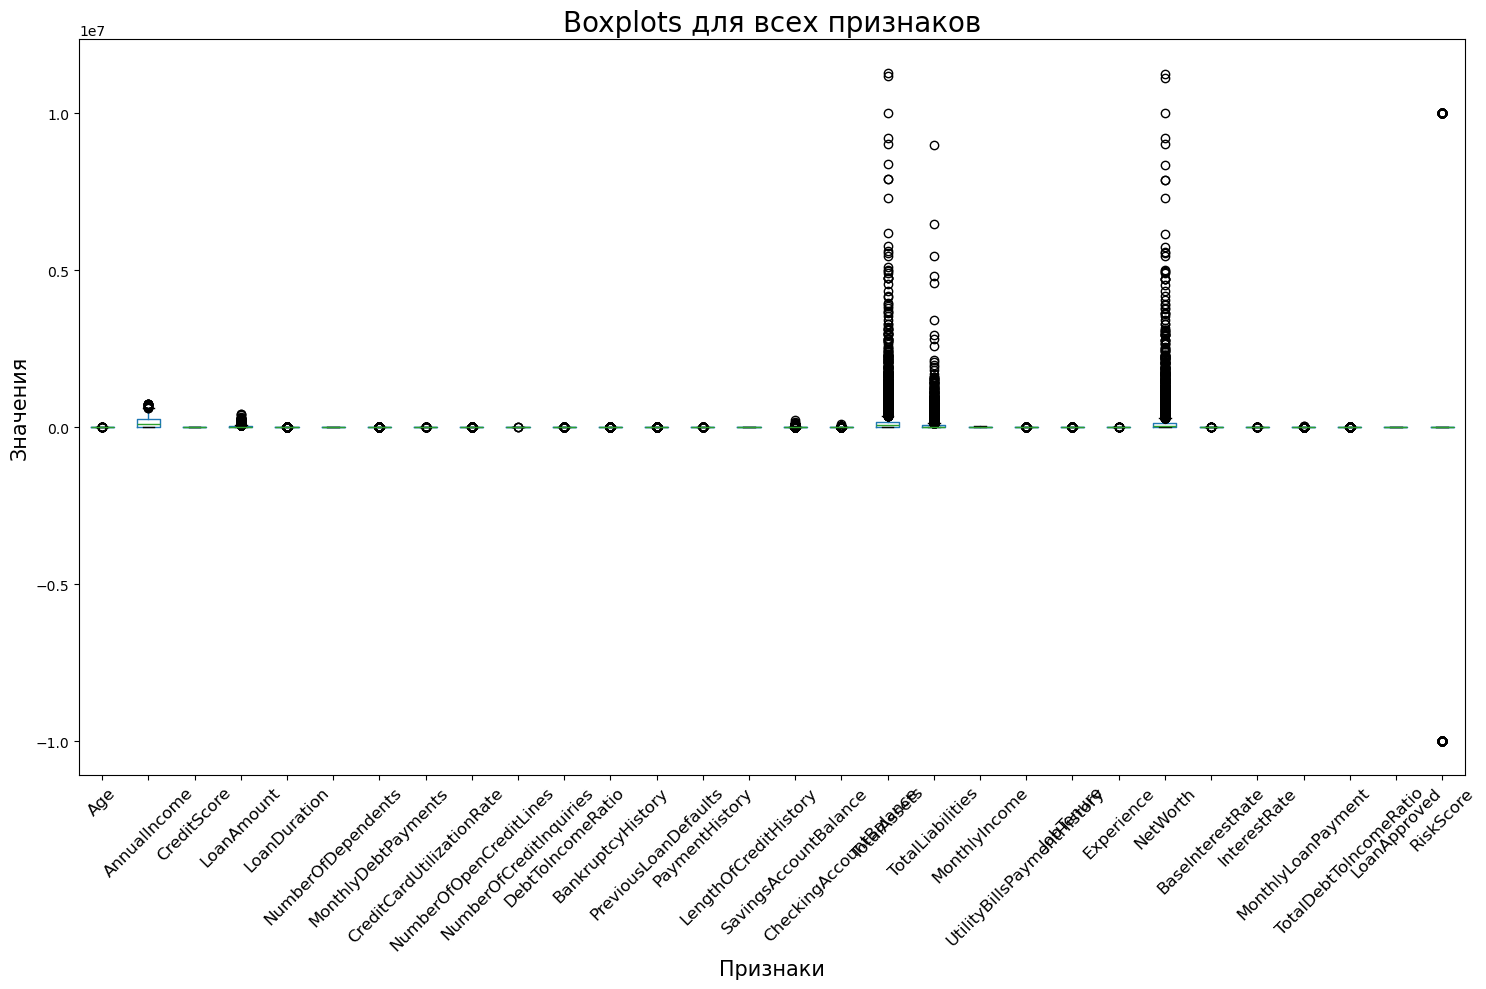

In [9]:
#1. Построим графики
import matplotlib.pyplot as plt
# Настройка размера графика
plt.figure(figsize=(15, 10))
# Построение боксплотов
train_df.boxplot(figsize=(15, 10), vert=True, grid=False)
# Настройка заголовка и меток с увеличенным размером шрифта
plt.title('Boxplots для всех признаков', fontsize=20)
plt.xlabel('Признаки', fontsize=15)
plt.ylabel('Значения', fontsize=15)
# Отображение графика с поворотом меток по оси x
plt.xticks(rotation=45, fontsize=12)  # Поворот меток по оси x для лучшей читаемости и увеличение размера шрифта
# Отображение графика
plt.tight_layout()  # Автоматическая подгонка элементов графика
plt.show()

In [10]:
"""# Создание гистограмм по признака
num_cols = len(train_df.columns)
cols = 4  
rows = (num_cols + cols - 1) // cols 

plt.figure(figsize=(15, rows * 3)) 

for i, column in enumerate(train_df.columns):
    plt.subplot(rows, cols, i + 1)  # Подграфик
    train_df[column].hist(bins=10, alpha=0.7)
    plt.title(column)
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    data_type = train_df[column].dtype
    plt.text(0.5, 0.9, str(data_type), ha='center', va='center', transform=plt.gca().transAxes)
plt.tight_layout() 
plt.show()"""

"# Создание гистограмм по признака\nnum_cols = len(train_df.columns)\ncols = 4  \nrows = (num_cols + cols - 1) // cols \n\nplt.figure(figsize=(15, rows * 3)) \n\nfor i, column in enumerate(train_df.columns):\n    plt.subplot(rows, cols, i + 1)  # Подграфик\n    train_df[column].hist(bins=10, alpha=0.7)\n    plt.title(column)\n    plt.xlabel('Значения')\n    plt.ylabel('Частота')\n    data_type = train_df[column].dtype\n    plt.text(0.5, 0.9, str(data_type), ha='center', va='center', transform=plt.gca().transAxes)\nplt.tight_layout() \nplt.show()"

In [11]:
# Вывод: у таргета явные выбросы, есть NaN у признаков

In [12]:
#2. Работа с признаками и таргетом

In [13]:
# Почистим выбросы в таргете
train_df = train_df[(train_df['RiskScore'] >= -100000) & (train_df['RiskScore'] <= 100000)]

In [14]:
# Удалим строки, в которых все столбцы NaN, обновим индексы
train_df = train_df.dropna(how='all').reset_index(drop=True)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10272 non-null  object 
 1   Age                         10272 non-null  float64
 2   AnnualIncome                10272 non-null  float64
 3   CreditScore                 9787 non-null   float64
 4   LoanAmount                  9787 non-null   float64
 5   LoanDuration                10272 non-null  float64
 6   MaritalStatus               10272 non-null  object 
 7   NumberOfDependents          10272 non-null  float64
 8   HomeOwnershipStatus         10272 non-null  object 
 9   MonthlyDebtPayments         9787 non-null   float64
 10  CreditCardUtilizationRate   10272 non-null  float64
 11  NumberOfOpenCreditLines     10272 non-null  float64
 12  NumberOfCreditInquiries     10272 non-null  float64
 13  DebtToIncomeRatio           102

In [16]:
# Удаляем признаки типа object
train_df = train_df.drop(columns=['ApplicationDate', 'MaritalStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel', 'HomeOwnershipStatus'])
X_test = X_test.drop(columns=['ApplicationDate', 'MaritalStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel', 'HomeOwnershipStatus'])

In [17]:
#Заполняем NaN средним значением

median_value = train_df['CreditScore'].mean()
train_df['CreditScore'] = train_df['CreditScore'].fillna(median_value)

median_value = train_df['LoanAmount'].mean()
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(median_value)

median_value = train_df['MonthlyDebtPayments'].mean()
train_df['MonthlyDebtPayments'] = train_df['MonthlyDebtPayments'].fillna(median_value)

median_value = train_df['CheckingAccountBalance'].mean()
train_df['CheckingAccountBalance'] = train_df['CheckingAccountBalance'].fillna(median_value)

median_value = train_df['TotalAssets'].mean()
train_df['TotalAssets'] = train_df['TotalAssets'].fillna(median_value)

median_value = train_df['NetWorth'].mean()
train_df['NetWorth'] = train_df['NetWorth'].fillna(median_value)

median_value = train_df['BaseInterestRate'].mean()
train_df['BaseInterestRate'] = train_df['BaseInterestRate'].fillna(median_value)

# Значения толко 1 и 0, поэтому берём mode, так как среднее даст новое число
mode_value = train_df['BankruptcyHistory'].mode()
train_df['BankruptcyHistory'] = train_df['BankruptcyHistory'].fillna(median_value)


In [18]:
#Посмотрим, что получилось
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10272 non-null  float64
 1   AnnualIncome                10272 non-null  float64
 2   CreditScore                 10272 non-null  float64
 3   LoanAmount                  10272 non-null  float64
 4   LoanDuration                10272 non-null  float64
 5   NumberOfDependents          10272 non-null  float64
 6   MonthlyDebtPayments         10272 non-null  float64
 7   CreditCardUtilizationRate   10272 non-null  float64
 8   NumberOfOpenCreditLines     10272 non-null  float64
 9   NumberOfCreditInquiries     10272 non-null  float64
 10  DebtToIncomeRatio           10272 non-null  float64
 11  BankruptcyHistory           10272 non-null  float64
 12  PreviousLoanDefaults        10272 non-null  float64
 13  PaymentHistory              102

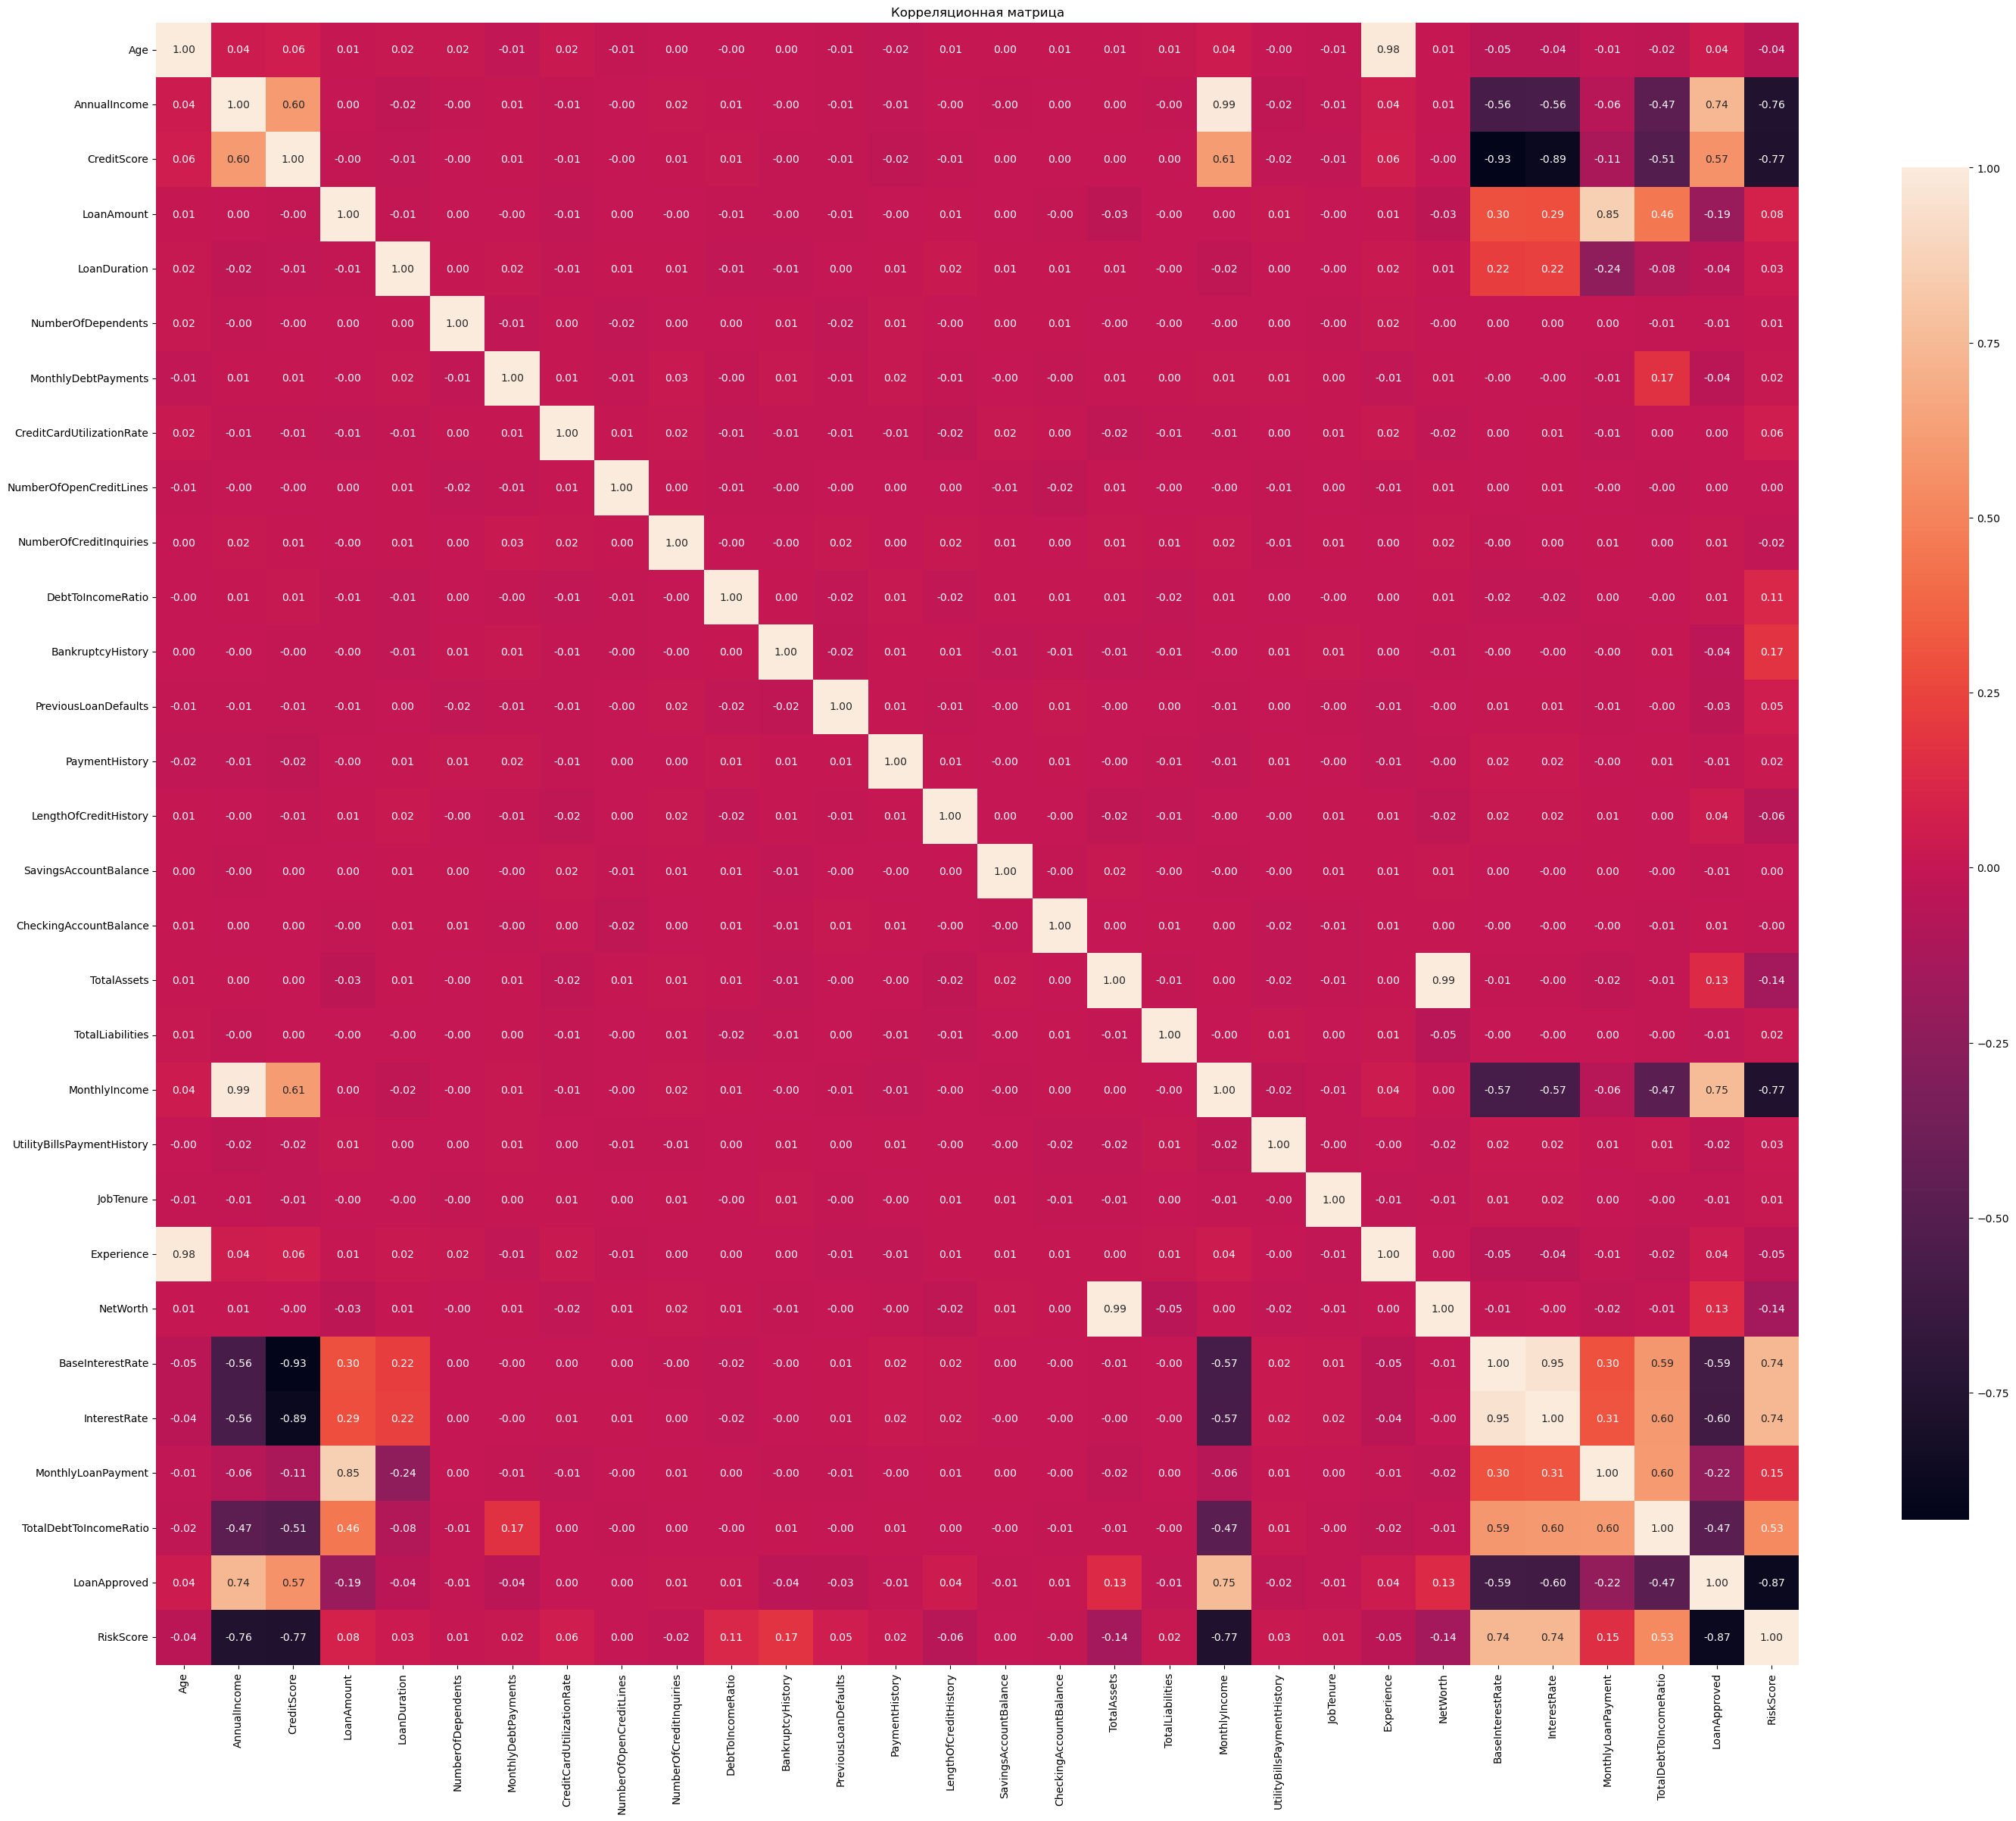

In [19]:
#Посмотрим коррелирующие признаки
import seaborn as sns
corr_matrix = train_df.corr()
plt.figure(figsize=(35, 29))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица')
plt.show()

In [20]:
# Годовой доход и месячный доход сильно коррелируют, можно выбросить годовой доход, так как месячный будет информативней
train_df = train_df.drop(columns=['AnnualIncome'])
X_test = X_test.drop(columns=['AnnualIncome'])

In [21]:
#3.Деление на фичи и таргет
y_column = train_df['RiskScore']
X_columns = train_df.drop(columns=['RiskScore'])


In [22]:
#4.деление на тренеровочную и валидациооную
X_train, X_valid, y_train, y_valid = train_test_split(
    X_columns, y_column, test_size=0.3, random_state=0)

In [23]:
#5.нормализация, уберём из тестовых данных колонку ID
#Нормализация данных зулучшит качество моделей машинного обучения, 
#ускорить обучение, повысить стабильность и сделать результаты более интерпретируемыми.
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = X_test.drop(columns=['ID'])
X_test = scaler.transform(X_test)

In [24]:
#6. Кросс-валидация 
n_alphas = 200
ridge_alphas = np.logspace(-5, 15, n_alphas)
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring="neg_mean_squared_error", cv=3)
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

8.504489341802685

In [25]:
#7.обучение
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge_reg = Ridge(random_state=17, alpha=8.5 , max_iter=100000000, fit_intercept=True, solver='auto', tol=0.001)
ridge_reg.fit(X_train, y_train)
ridge_scaled_valid_pred = ridge_reg.predict(X_valid)
np.sqrt(mean_squared_error(ridge_scaled_valid_pred, y_valid))

4.62597339372491

In [26]:
#8. Отправляем полученные результаты
test_PRED = ridge_reg.predict(X_test)
ids = np.arange(test_PRED.shape[0]).reshape(-1, 1)
data_reshaped = test_PRED.reshape(-1, 1)
data_with_ids = np.hstack((ids, data_reshaped))
df_out = pd.DataFrame(data_with_ids, columns=['ID', 'RiskScore'])
df_out.to_csv('submission.csv', index=False)

In [27]:
#Вывод: модель можно улучшать почти бесконечно. В данной работе были рассмотренны основные аспекты работы с данными, 
#можно придумать ещё различные признаки. Эта работа выполнена для получения оценки по дедлайну. 
#Если надо показать более изощрённые способы работы с данными, то могу переделать:)